In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("kawa.xlsx", index_col='lp.', usecols=['lp.', 'GM', 'T', 'Bartek', 'Krzysiek', 'Amelia', 'Ola', 'Przemek'])

cols = ['Bartek', 'Krzysiek', 'Amelia', 'Ola', 'Przemek']

column_means = data.mean()
# fill rows with NaNs only with -1
rows_all_nan = data[cols].isnull().all(axis=1)
data.loc[rows_all_nan, cols] = -1
# fill left NaNs with mean of each column
data.fillna(column_means, inplace=True)

data

,GM,T,Bartek,Krzysiek,Amelia,Przemek,Ola
lp.,,,,,,,
8,13,94,15.0,40.0,40.0,55.000000,40.000000
22,12,100,30.0,45.0,32.0,49.000000,55.000000
1,11,92,40.0,55.0,15.0,41.615385,55.000000
17,12,98,20.0,40.0,20.0,41.615385,80.000000
4,14,92,40.0,60.0,51.0,41.615385,30.000000
6,11,94,60.0,70.0,55.0,40.000000,45.000000
14,14,96,52.0,75.0,67.0,34.000000,40.000000
12,12,96,27.0,30.0,8.0,41.615385,30.000000
13,13,96,60.0,70.0,20.0,25.000000,30.000000


In [3]:
# calculate mean, and create pivot table
data['mean'] = data[cols].agg(['mean'], axis=1)
table = data.pivot_table(values='mean', index=data.GM, columns='T')
table

T,92,94,96,98,100
GM,,,,,
10,42.000000,45.400000,36.200000,42.523077,-1.000000
11,41.323077,54.000000,47.800000,-1.000000,-1.000000
12,-1.000000,15.847059,27.323077,40.323077,42.200000
13,-1.000000,38.000000,41.000000,25.400000,50.923077
14,44.523077,57.647059,53.600000,39.000000,-1.000000


In [4]:
# create data to plot
Z = table.to_numpy()
Y = table.index.to_numpy()
X = table.columns.to_numpy()

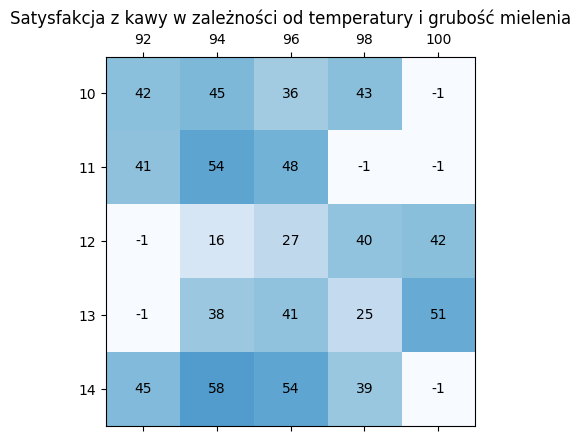

In [5]:
# Display table with colormap
fig3, ax3 = plt.subplots()
ax3.matshow(Z, cmap=plt.cm.Blues, vmin=0, vmax=100)
ax3.set_title("Satysfakcja z kawy w zależności od temperatury i grubość mielenia")
ax3.set_xticks([i for i in range(len(X))])
ax3.set_xticklabels(X)
ax3.set_yticks([i for i in range(len(Y))])
ax3.set_yticklabels(Y)

for i in range(len(Z[0])):
    for j in range(len(Z)):
        c = round(Z[j,i])
        ax3.text(i, j, str(c), va='center', ha='center')